In [4]:
import pandas as pd
import matplotlib.pyplot as plt


**R ́ecup ́erer des donn ́ees `a partir de fichier advertising.scv et d ́ecouvrir ses principales caract ́eristiques**

In [5]:
data_adver = pd.read_csv('advertising.csv')
data_adver.head(6)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2


**2. Initialiser X (predictors, variable ind ́ependante) par la variable TV et y (cible, variable d ́ependante)**

In [3]:
X = data_adver['TV']
y = data_adver['Sales']

print('Variable indep X:\n',X)
print('Variable cible y:\n',y)

Variable indep X:
 0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64
Variable cible y:
 0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


**3. Pourquoi il s’agit d’un probl`eme de r ́egression**
*Il s'agit d'un problème de régression car l'objectif est de prédire une valeur continue en fonction de plusieurs variables indépendantes*

**4. Visualiser la base de donn ́ees avec matplotlib.**

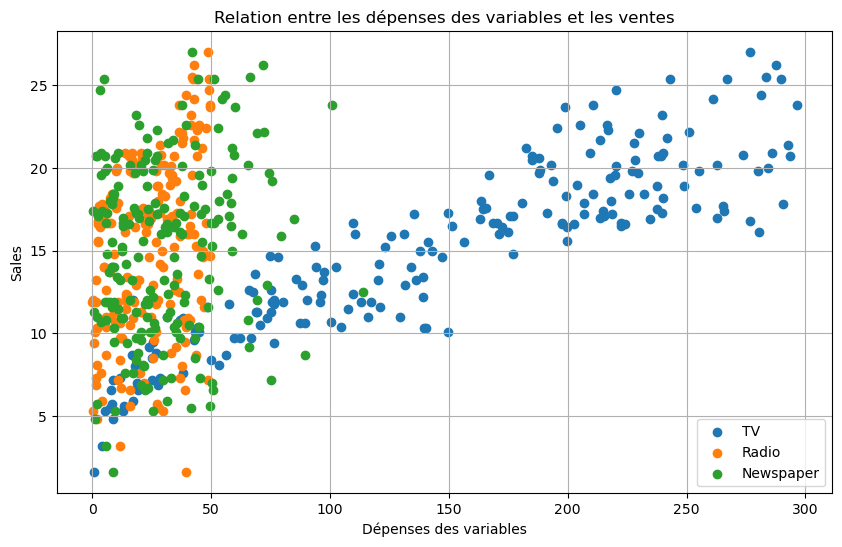

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(data_adver['TV'], data_adver['Sales'], label='TV')
plt.scatter(data_adver['Radio'], data_adver['Sales'], label='Radio')
plt.scatter(data_adver['Newspaper'], data_adver['Sales'], label='Newspaper')
plt.xlabel('Dépenses des variables')
plt.ylabel('Sales')
plt.title('Relation entre les dépenses des variables et les ventes')
plt.legend()
plt.grid(True)

plt.show()


In [5]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
'''
MSE(X,y,W) qui retourne la moyenne des erreurs entre la valeur th ́eorique et la valeur
r eelle
'''
def mse(X, y,W):
    y_pred = W[0] + W[1] * X
    mse = ((y - y_pred) ** 2).mean()
    return float(mse)

def gradient(X, y, w):
    grad = []
    y_pred = w[0] + w[1] * X
    grad.append((-2 * (y - y_pred).mean()) / len(y))
    grad.append((-2 * (X * (y - y_pred)).mean()) / len(y))
    return grad

def miseJour(grad,w,alfa): 
    # Mise à jour des coefficients
    w[0] = w[0] - alfa * grad[0]
    w[1] = w[1] - alfa * grad[1]
    return w

def batchGradDesc(X,y,W,N_max,alfa,eps):
    erreurs = []
    for i in range(N_max):
        mq=mse(X,y,W)
        grad = gradient(X,y,W)
        W = miseJour(grad,W,alfa)
        erreurs.append(mq)
        #print('mse: ',mq)
        if mq < eps:
            break
    return W, mq,erreurs
    


** Batch Gradient Descent(X,y,W,N max,alpha,eps), qui retourne les meilleurs param`etres es-
tim ́es et de plus affiche l’ ́evolution de MSE apr`es chaque it ́eration **

In [37]:
W1 = [0,0]
w,mseV,errs = batchGradDesc(x_train,y_train,W1,100,0.001,10)
print('meilleure erreur: ',mseV)
print('les poids: ',w)

meilleure erreur:  16.742180919539816
les poids:  [0.0025574319066301978, 0.09099847125718255]


**Tracer l’MSE**

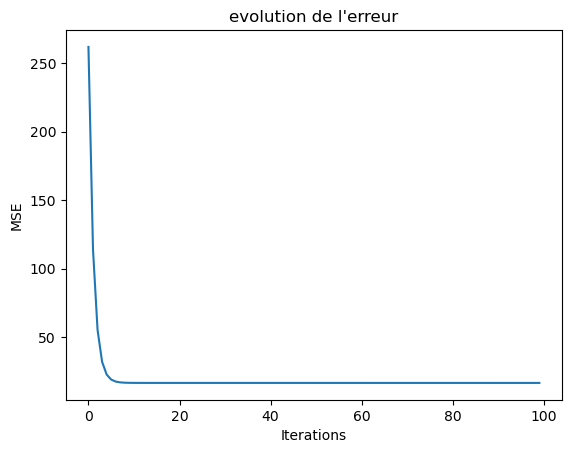

In [12]:
plt.plot(errs)
plt.title("evolution de l'erreur")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

**Le model apres calcule des poids**

In [43]:
def model(w,x):
    return w[0]+w[1]*x

model(w,150)

13.801808998526296

**Cross validation manually**

mse temp:  16.043780950547795


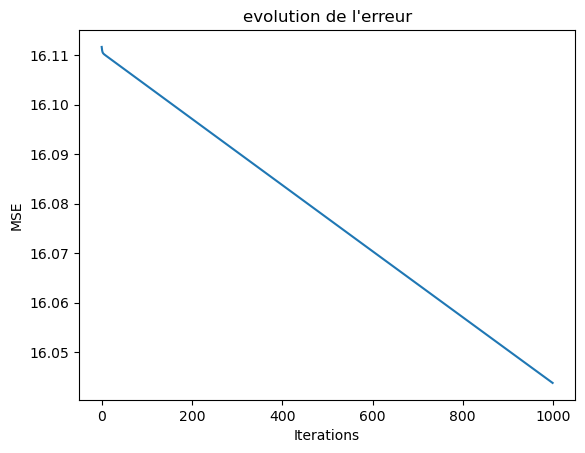

mse temp:  18.19637984009359


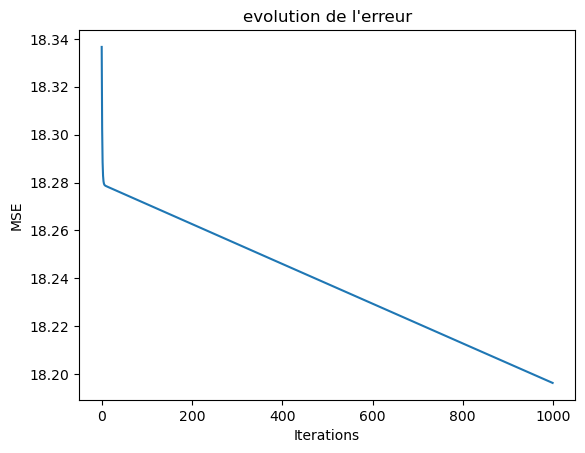

mse temp:  17.645798737290328


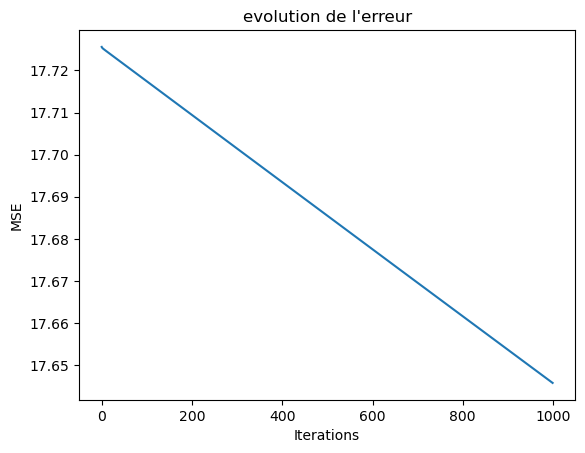

mse temp:  16.31851320481006


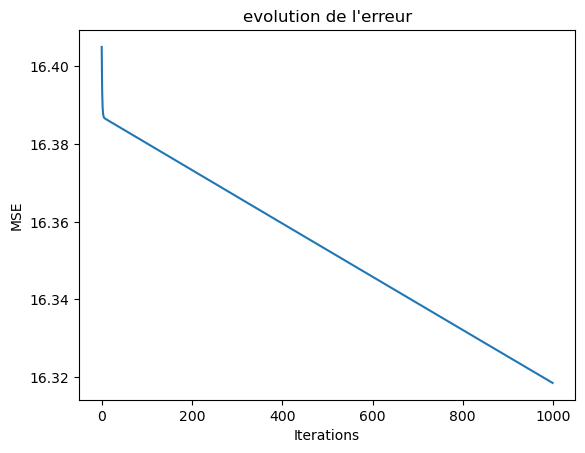

mse temp:  17.465414312574786


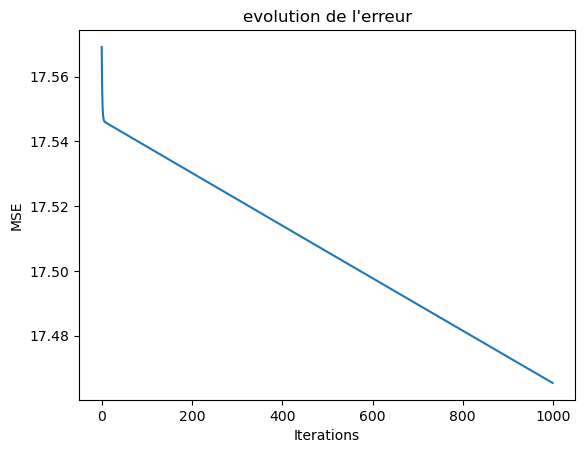

Precision du model: 17.133977409063313


In [42]:
# nombre de split
k = 5
taille = len(X) // k
erreurs = []
# cross-validation
for i in range(k):
    start = i * taille
    end = (i + 1) * taille
    test_X = X.iloc[start:end]
    test_y = y.iloc[start:end]
    train_X = pd.concat([X.iloc[:start], X.iloc[end:]])
    train_y = pd.concat([y.iloc[:start], y.iloc[end:]])

    # teste de model
    w,mseV,errs = batchGradDesc(train_X,train_y,W1,1000,0.001,10)
    print('mse temp: ',mseV)
    erreurs.append(mseV)
    plt.plot(errs)
    plt.title("evolution de l'erreur")
    plt.xlabel('Iterations')
    plt.ylabel('MSE')
    plt.show()

# la moyenne
moyenne = np.mean(erreurs)
print(f'Precision du model: {moyenne}')


**Regression multiple**

In [89]:
import numpy as np

def mseMulti(X, y, W):
    y_pred = np.dot(X, W)
    mse = ((y - y_pred) ** 2).mean()
    return mse

def gradient(X, y, W):
    n = len(y)
    y_pred = np.dot(X, W)
    error = y - y_pred
    grad = (-2/n) * np.dot(X.T, error)
    return grad

def miseJour(grad, W, alfa):
    W = W - alfa * grad
    return W

def batchGradDescM(X, y, W, N_max, alfa, eps):
    erreurs = []
    for i in range(N_max):
        mq = mseMulti(X, y, W)
        grad = gradient(X, y, W)
        W = miseJour(grad, W, alfa)
        erreurs.append(mq)
        if mq < eps:
            break
    return W, mq, erreurs


mse temp:  4.998979177899624


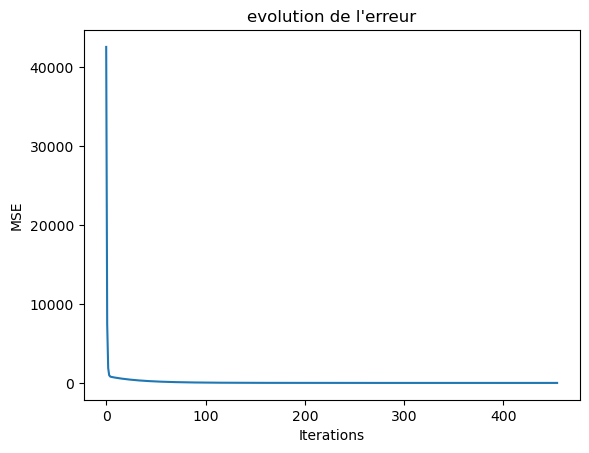

In [87]:
X = data_adver.drop(columns='Sales')
X['bias'] = 1
y = data_adver['Sales']
# learning rate is critical
poids,mseM,errs=batchGradDescM(X,y,[1,1,1,1],1000,0.00001,5)

print('mse temp: ',mseM)
plt.plot(errs)
plt.title("evolution de l'erreur")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

**validation croise**

mse temp:  4.393707263760917


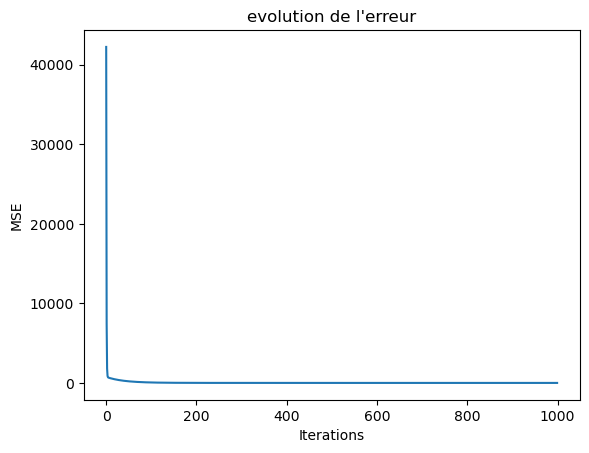

mse temp:  5.031383553005728


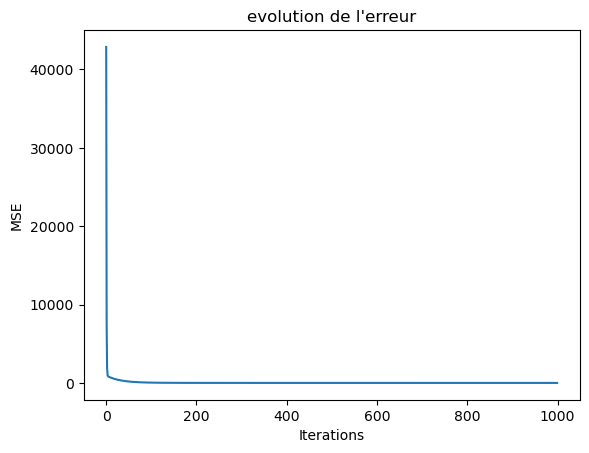

mse temp:  4.6575473818726305


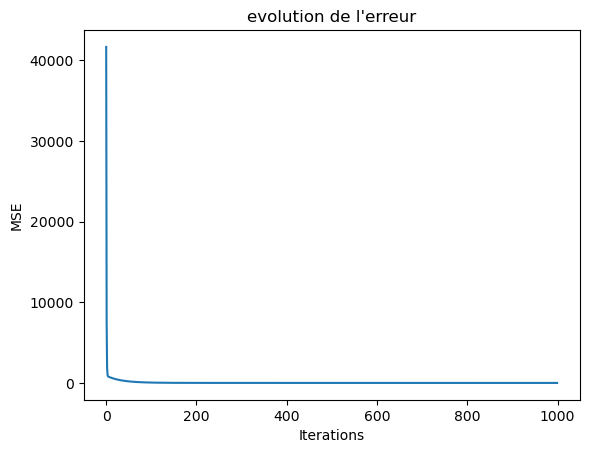

mse temp:  4.613359091519934


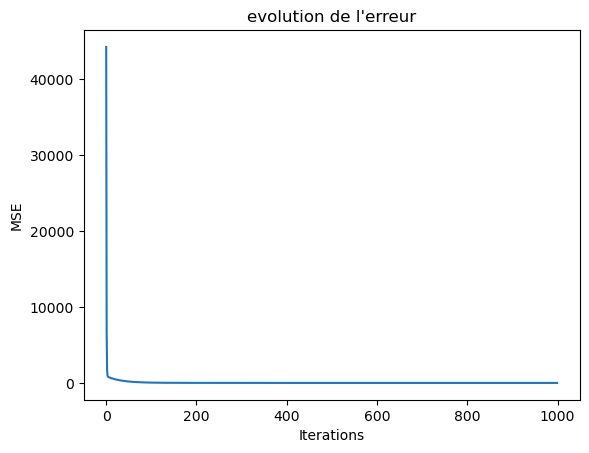

mse temp:  4.460946252647194


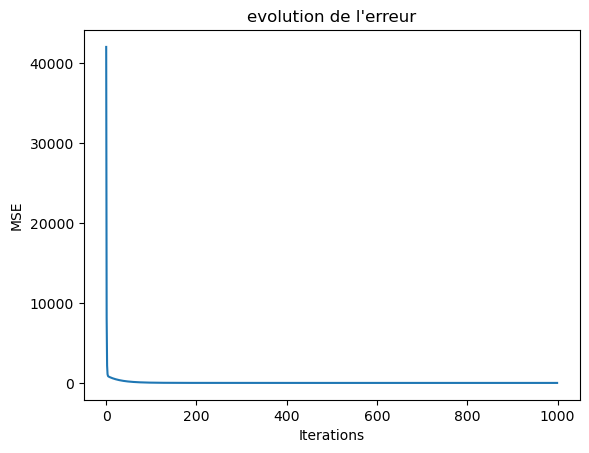

Precision du model: 4.63138870856128


In [95]:
# nombre de split
k = 5
taille = len(X) // k
erreurs = []
# cross-validation
for i in range(k):
    start = i * taille
    end = (i + 1) * taille
    test_X = X.iloc[start:end]
    test_y = y.iloc[start:end]
    train_X = pd.concat([X.iloc[:start], X.iloc[end:]])
    train_y = pd.concat([y.iloc[:start], y.iloc[end:]])

    # teste de model
    w,mseV,errs = batchGradDescM(train_X,train_y,[1,1,1,1],1000,0.00001,2)
    print('mse temp: ',mseV)
    erreurs.append(mseV)
    plt.plot(errs)
    plt.title("evolution de l'erreur")
    plt.xlabel('Iterations')
    plt.ylabel('MSE')
    plt.show()

# la moyenne
moyenne = np.mean(erreurs)
print(f'Precision du model: {moyenne}')
